# 【自前AI講座】線形回帰の理論／数式／コード実装

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# 離散点 x, y を定義
x = np.arange(0, 5)
y = np.array([5, 2, 4, 3, 1])

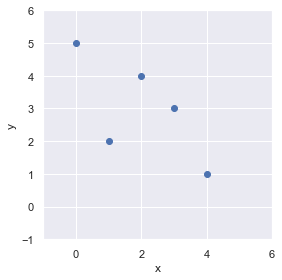

In [3]:
fig = plt.figure(facecolor="white")
ax = plt.axes()
ax.scatter(x, y)
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 6)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(aspect="equal")
fig.tight_layout()
plt.show()

In [4]:
# 傾き
a = np.cov(x, y, ddof=0) / np.std(x, ddof=0)**2
a = a[0,1]

# 切片
b = np.mean(y) - a * np.mean(x)

print(f"傾き： a = {a}, 切片： b = {b}")

傾き： a = -0.7, 切片： b = 4.4


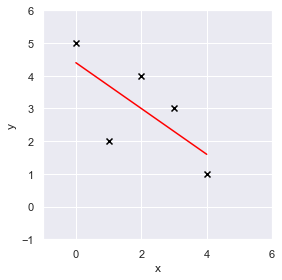

In [5]:
fig = plt.figure(facecolor="white")
ax = plt.axes()
ax.scatter(x, y, color="black", marker="x")
ax.plot(x, a*x + b, color="red")
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 6)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(aspect="equal")
fig.tight_layout()
plt.show()

In [6]:
arr = x.reshape(-1, 1)
print(f"x.shape = {x.shape}, arr.shape = {arr.shape}")

x.shape = (5,), arr.shape = (5, 1)


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression(fit_intercept=True)
model.fit(arr, y)
pred = model.predict(arr)
print(pred)

[4.4 3.7 3.  2.3 1.6]


In [9]:
print(f"傾き： a = {model.coef_}, 切片： b = {model.intercept_}")

傾き： a = [-0.7], 切片： b = 4.4


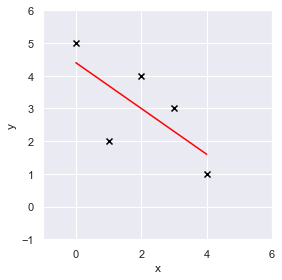

In [10]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(x, y, color="black", marker="x")
ax.plot(x, model.predict(arr), color="red")
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 6)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(aspect="equal")
fig.tight_layout()
plt.show()

In [11]:
# 指定乱数シードによるランダムジェネレータを設定
rng = np.random.RandomState(seed=0)

# x, y を定義
x = np.arange(start=0, stop=100+0.1, step=0.1)
y = x + rng.uniform(low=-5, high=5, size=len(x))
x = x.reshape(-1, 1)

print(x.shape, y.shape)

(1001, 1) (1001,)


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# 学習用と評価用のデータをシャッフルせずに 6 : 4 に分ける
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, shuffle=False)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(600, 1) (401, 1) (600,) (401,)


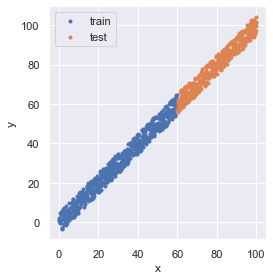

In [14]:
fig = plt.figure(facecolor="white")
ax = plt.axes()
ax.scatter(x_train, y_train, marker=".", label="train")
ax.scatter(x_test, y_test, marker=".", label="test")
ax.set_aspect(aspect="equal")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(loc="upper left")
fig.tight_layout()
plt.show()

In [15]:
model = LinearRegression()
model.fit(X=x_train, y=y_train)

LinearRegression()

In [16]:
pred = model.predict(x)
pred.shape

(1001,)

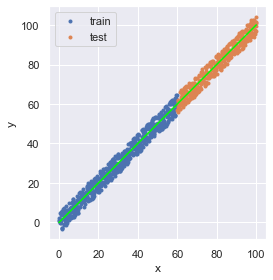

In [17]:
fig = plt.figure(facecolor="white")
ax = plt.axes()
ax.scatter(x_train, y_train, marker=".", label="train")
ax.scatter(x_test, y_test, marker=".", label="test")
ax.plot(x, pred, color="lime")
ax.set_aspect(aspect="equal")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(loc="upper left")
fig.tight_layout()
plt.show()

In [18]:
print(f"傾き： a = {model.coef_}, 切片： b = {model.intercept_}")

傾き： a = [1.00166797], 切片： b = -0.0679279030371518


In [119]:
# 指定乱数シードによるランダムジェネレータを設定
rng = np.random.RandomState(seed=0)

# x, y を定義
x = rng.uniform(low=0, high=100, size=len(x))
y = rng.uniform(low=0, high=100, size=len(x))
z = x**2 + x

print(x.shape, y.shape, z.shape)

(1001,) (1001,) (1001,)


In [120]:
# 学習用と評価用のデータをシャッフルせずに 6 : 4 に分ける
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(
    x, y, z, test_size=0.4, shuffle=False,
)
print(
    x_train.shape,
    x_test.shape,
    y_train.shape,
    y_test.shape,
    z_train.shape,
    z_test.shape,
)

(600,) (401,) (600,) (401,) (600,) (401,)


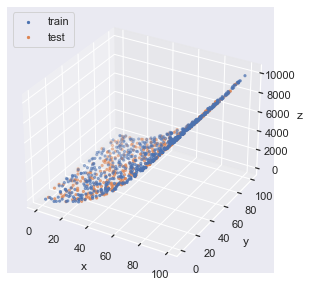

In [121]:
fig = plt.figure(facecolor="white")
ax = plt.axes(projection="3d")
ax.scatter(x_train, y_train, z_train, marker=".", label="train")
ax.scatter(x_test, y_test, z_test, marker=".", label="test")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend(loc="upper left")
fig.tight_layout()
plt.show()

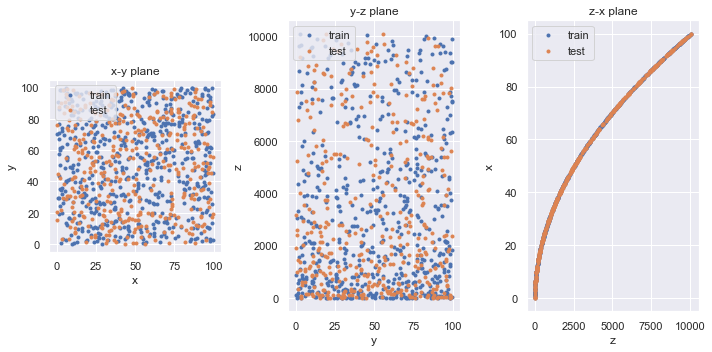

In [122]:
fig = plt.figure(facecolor="white", figsize=(10,5))

# x-y 平面に射影
ax1 = fig.add_subplot(1,3,1)
ax1.scatter(x_train, y_train, marker=".", label="train")
ax1.scatter(x_test, y_test, marker=".", label="test")
ax1.set_aspect(aspect="equal")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend(loc="upper left")
ax1.set_title("x-y plane")

# y-z 平面に射影
ax2 = fig.add_subplot(1,3,2)
ax2.scatter(y_train, z_train, marker=".", label="train")
ax2.scatter(y_test, z_test, marker=".", label="test")
# ax2.set_aspect(aspect="equal")
ax2.set_xlabel("y")
ax2.set_ylabel("z")
ax2.legend(loc="upper left")
ax2.set_title("y-z plane")

# z-x 平面に射影
ax3 = fig.add_subplot(1,3,3)
ax3.scatter(z_train, x_train, marker=".", label="train")
ax3.scatter(z_test, x_test, marker=".", label="test")
# ax3.set_aspect(aspect="equal")
ax3.set_xlabel("z")
ax3.set_ylabel("x")
ax3.legend(loc="upper left")
ax3.set_title("z-x plane")

fig.tight_layout()
plt.show()

In [123]:
arr = np.stack((x, y), axis=1)
arr_train = np.stack((x_train, y_train), axis=1)
arr_test = np.stack((x_test, y_test), axis=1)
print(arr.shape)

(1001, 2)


In [127]:
model = LinearRegression()
model.fit(arr_train, z_train)
pred = model.predict(arr)
print(pred.shape)

(1001,)


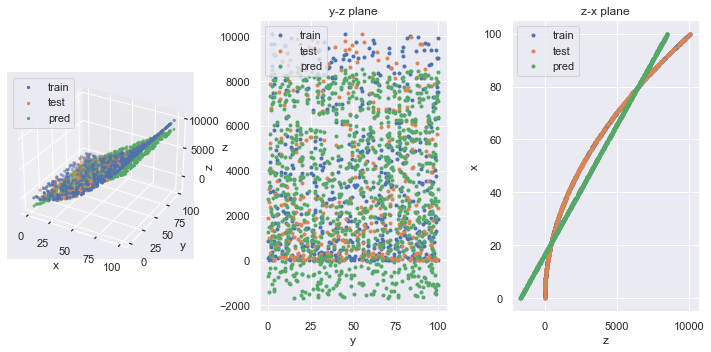

In [129]:
fig = plt.figure(facecolor="white", figsize=(10,5))

# 3D
ax1 = fig.add_subplot(1,3,1, projection="3d")
ax1.scatter(x_train, y_train, z_train, marker=".", label="train")
ax1.scatter(x_test, y_test, z_test, marker=".", label="test")
ax1.scatter(x, y, pred, marker=".", label="pred")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax1.legend(loc="upper left")

# y-z 平面に射影
ax2 = fig.add_subplot(1,3,2)
ax2.scatter(y_train, z_train, marker=".", label="train")
ax2.scatter(y_test, z_test, marker=".", label="test")
ax2.scatter(y, pred, marker=".", label="pred")
# ax2.set_aspect(aspect="equal")
ax2.set_xlabel("y")
ax2.set_ylabel("z")
ax2.legend(loc="upper left")
ax2.set_title("y-z plane")

# z-x 平面に射影
ax3 = fig.add_subplot(1,3,3)
ax3.scatter(z_train, x_train, marker=".", label="train")
ax3.scatter(z_test, x_test, marker=".", label="test")
ax3.scatter(pred, x, marker=".", label="pred")
# ax3.set_aspect(aspect="equal")
ax3.set_xlabel("z")
ax3.set_ylabel("x")
ax3.legend(loc="upper left")
ax3.set_title("z-x plane")

fig.tight_layout()
plt.show()

---

## 演習用

In [177]:
from sklearn.datasets import load_wine

In [178]:
df_x, df_y = load_wine(return_X_y=True, as_frame=True)
print(df_x.shape, df_y.shape)

(178, 13) (178,)


In [179]:
x_train, x_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size=0.1, shuffle=True, random_state=0,
)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(160, 13) (18, 13) (160,) (18,)


In [180]:
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(df_x)
print(pred[:10])

[-0.20679955 -0.11857825  0.09087155 -0.17405687  0.53512919 -0.24565238
 -0.13697552 -0.129637    0.02710705  0.06377903]


In [181]:
pred_cate = pred.astype(np.uint8)
print(pred_cate)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0
 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1
 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1
 2 1 1 2 2 2 1 2 2 1 2 2 2 1 1 1 2 2 2 2 1 2 1 2 1 1 1 2 1 2]


In [182]:
from sklearn.metrics import accuracy_score

In [183]:
print(accuracy_score(y_true=df_y, y_pred=pred_cate))

0.6179775280898876


In [184]:
from sklearn.datasets import fetch_california_housing

In [185]:
df_x, df_y = fetch_california_housing(return_X_y=True, as_frame=True)
x_train, x_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size=0.25, shuffle=True, random_state=0,
)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(15480, 8) (5160, 8) (15480,) (5160,)


In [186]:
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(pred.shape)

(5160,)


In [187]:
from sklearn.metrics import mean_absolute_error

In [188]:
print(mean_absolute_error(y_true=y_test, y_pred=pred))

0.5368950735045219
